In [1]:
# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.22.1


In [2]:
import time

import numpy as np
import pylab as pl

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import euclidean_distances
#from sklearn.datasets.samples_generator import make_blobs

import math
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score

from scipy.spatial import ConvexHull,convex_hull_plot_2d

In [3]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [4]:
#local path where the data locates, change it to your local path
record= pd.read_csv("Desktop/Carnivore_Research/2020Nov10_CarnivoreSpotter.csv")

In [5]:
col=['Time_Seen','Species','Latitude','Longitude','Media']

In [6]:
record.columns = col
record['Time_Seen'] = pd.to_datetime(record.Time_Seen,utc=True).copy()
record['Month'] = record.Time_Seen.dt.month
record['Hour'] = record.Time_Seen.dt.hour
record['Year'] = record.Time_Seen.dt.year

In [7]:
rec_photo = record[record['Media'].str.len()>3] #the rows contain url

In [8]:
rec_photo = rec_photo[(rec_photo['Latitude']>minLat)&(rec_photo['Latitude']<maxLat)&(rec_photo['Longitude']>minLon)&(rec_photo['Longitude']<maxLon)]

In [9]:
rec_photo = rec_photo[rec_photo.Year==2020]
rec_photo.count()

Time_Seen    252
Species      252
Latitude     252
Longitude    252
Media        252
Month        252
Hour         252
Year         252
dtype: int64

In [10]:
rec_coyo = rec_photo[(rec_photo.Species == 'Coyote')]

In [11]:
rec_coyo.count()

Time_Seen    73
Species      73
Latitude     73
Longitude    73
Media        73
Month        73
Hour         73
Year         73
dtype: int64

In [12]:
rec_coyo = rec_coyo.drop(['Media'],axis=1)

In [13]:
summer = rec_coyo[(rec_coyo.Month>=6)&(rec_coyo.Month<=8)] 
fall = rec_coyo[(rec_coyo.Month>=9)&(rec_coyo.Month<=11)]
winter = rec_coyo[(rec_coyo.Month==12)|((rec_coyo.Month==1)|(rec_coyo.Month==2))]
spring = rec_coyo[(rec_coyo.Month>=3)&(rec_coyo.Month<=5)]

In [14]:
summer = summer.drop(['Time_Seen','Species','Month','Hour','Year'],axis=1)
fall = fall.drop(['Time_Seen','Species','Month','Hour','Year'],axis=1)
winter = winter.drop(['Time_Seen','Species','Month','Hour','Year'],axis=1)
spring = spring.drop(['Time_Seen','Species','Month','Hour','Year'],axis=1)

In [15]:
summer_scaled=StandardScaler().fit_transform(summer)
fall_scaled=StandardScaler().fit_transform(fall)
winter_scaled=StandardScaler().fit_transform(winter)
spring_scaled=StandardScaler().fit_transform(spring)

In [16]:
summer_kmeans = KMeans(n_clusters=3)
summer_kmeans.fit(summer_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

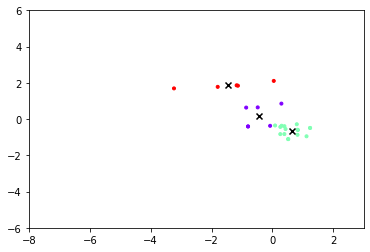

In [17]:
plt.xlim(-8,3)
plt.ylim(-6,6)

plt.scatter(summer_scaled[:,0], summer_scaled[:,1], c=summer_kmeans.labels_, cmap='rainbow',marker='.')
plt.scatter(summer_kmeans.cluster_centers_[:,0] ,summer_kmeans.cluster_centers_[:,1], color='black',marker="x")

In [18]:
fall_kmeans = KMeans(n_clusters=3)
fall_kmeans.fit(fall_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

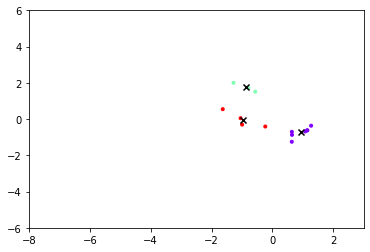

In [19]:
plt.xlim(-8,3)
plt.ylim(-6,6)

plt.scatter(fall_scaled[:,0], fall_scaled[:,1], c=fall_kmeans.labels_, cmap='rainbow',marker='.')
plt.scatter(fall_kmeans.cluster_centers_[:,0] ,fall_kmeans.cluster_centers_[:,1], color='black',marker="x")

In [20]:
winter_kmeans = KMeans(n_clusters=3)
winter_kmeans.fit(winter_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

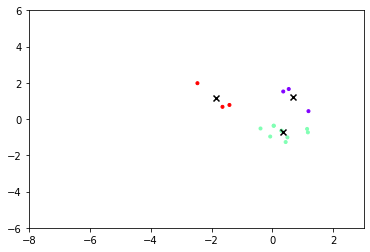

In [21]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.scatter(winter_scaled[:,0], winter_scaled[:,1], c=winter_kmeans.labels_, cmap='rainbow',marker='.')
plt.scatter(winter_kmeans.cluster_centers_[:,0] ,winter_kmeans.cluster_centers_[:,1], color='black',marker="x")

In [22]:
spring_kmeans = KMeans(n_clusters=3)
spring_kmeans.fit(spring_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

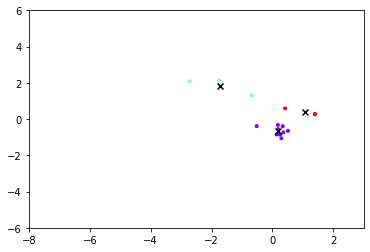

In [23]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.scatter(spring_scaled[:,0], spring_scaled[:,1], c=spring_kmeans.labels_, cmap='rainbow',marker='.')
plt.scatter(spring_kmeans.cluster_centers_[:,0] ,spring_kmeans.cluster_centers_[:,1], color='black',marker="x")